In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import functools as f
from sklearn.model_selection import train_test_split
import splitfolders

from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

#from keras.layers.advanced_activations import LeakyReLU
import visualkeras

%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
splitfolders.ratio('../Alzheimer_classification/Dataset', output="output", seed=1345, ratio=(.8, 0.1,0.1))

Copying files: 6400 files [00:23, 269.46 files/s]


In [3]:
mild_dem = ('mild_dem '*896).split()
mod_dem = ('mod_dem '*64).split()
non_dem = ('non_dem '*3200).split()
very_mild_dem = ('very_mild_dem '*2240).split()

In [4]:
labels = [mild_dem, mod_dem, non_dem, very_mild_dem]
labels = f.reduce(lambda x, y: x+y, labels)
labels = pd.Series(labels)
labels = pd.DataFrame(labels, columns = ['label'])

In [5]:
labels.to_csv('labels.csv')

In [6]:
y = labels
y_test, y_train = train_test_split(y, train_size=0.25, stratify=y)

In [7]:
y_train.label.value_counts()

non_dem          2400
very_mild_dem    1680
mild_dem          672
mod_dem            48
Name: label, dtype: int64

In [8]:
#data_dir ='ouput/'  
img_height = 128
img_width = 128

train = tf.keras.utils.image_dataset_from_directory(
    'output/train',
    batch_size=64,
    image_size=(img_height, img_width),
    seed=123,
)

test = tf.keras.utils.image_dataset_from_directory(
    'output/test',
    batch_size=64,
    image_size=(img_height, img_width),
    seed=123,
)

val = tf.keras.utils.image_dataset_from_directory(
    'output/val',
    batch_size=64,
    image_size=(img_height, img_width),
    seed=123,
)

Found 5119 files belonging to 4 classes.
Found 961 files belonging to 4 classes.
Found 958 files belonging to 4 classes.


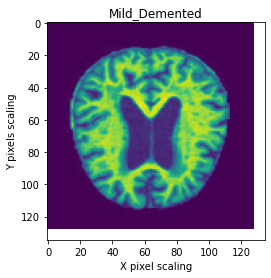

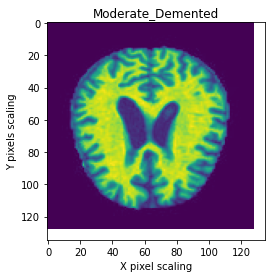

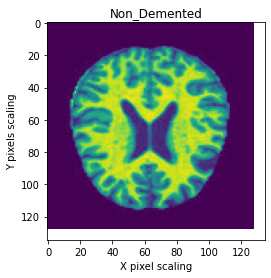

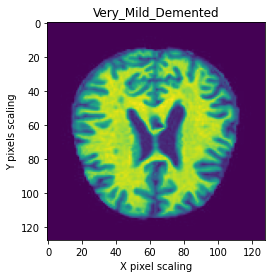

In [9]:
#Visualize images
dem_types = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
examples = ['Mild_Demented/mild_2.jpg', 'Moderate_Demented/moderate_2.jpg', 'Non_Demented/non_2.jpg', 'Very_Mild_Demented/verymild_2.jpg']
for i in range(len(dem_types)): 
    plt.plot(128,128)
    plt.figure(i+1) 
    plt.title(dem_types[i])
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    plt.imshow(image.imread('Dataset/'+ examples[i]))
plt.show()

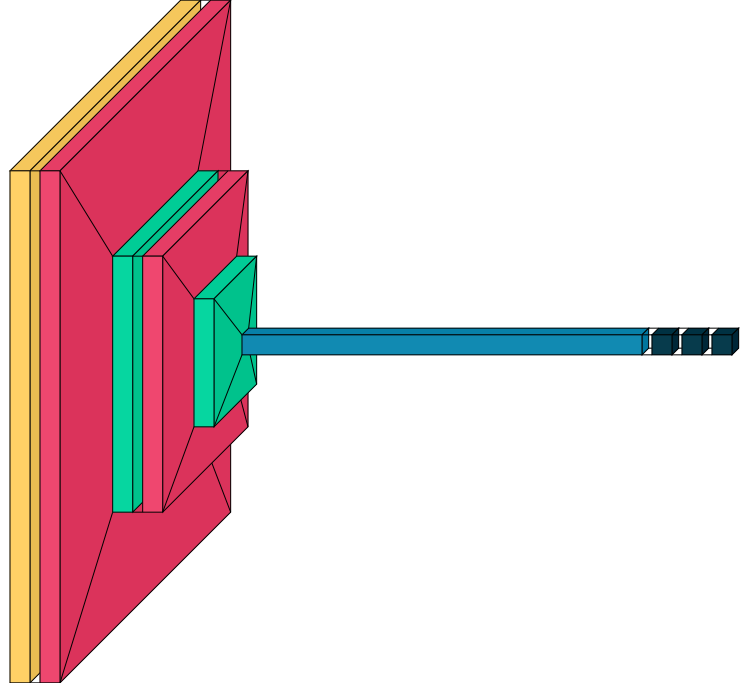

In [10]:
#LeNet-5 CNN Architecture
model = keras.Sequential()
model.add(Rescaling(1./255, input_shape=(128, 128, 3)))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape = (128, 128, 3), kernel_initializer="he_normal"))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape = (128, 128, 3), kernel_initializer="he_normal"))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(units = 128, activation = 'relu', kernel_initializer="he_normal"))
model.add(layers.Dense(units = 64, activation = 'relu'))
model.add(layers.Dense(units = 4, activation = 'softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
visualkeras.layered_view(model)

In [11]:
hist = model.fit(train, epochs = 50, validation_data = val)

Epoch 1/50
80/80 [==============================] - 65s 746ms/step - loss: 1.0979 - accuracy: 0.5263 - val_loss: 0.8069 - val_accuracy: 0.6441
Epoch 2/50
80/80 [==============================] - 51s 633ms/step - loss: 0.7394 - accuracy: 0.6814 - val_loss: 0.5722 - val_accuracy: 0.7818
Epoch 3/50
80/80 [==============================] - 50s 621ms/step - loss: 0.4795 - accuracy: 0.8146 - val_loss: 0.4231 - val_accuracy: 0.8225
Epoch 4/50
80/80 [==============================] - 50s 620ms/step - loss: 0.3415 - accuracy: 0.8634 - val_loss: 0.2619 - val_accuracy: 0.9175
Epoch 5/50
80/80 [==============================] - 52s 643ms/step - loss: 0.1914 - accuracy: 0.9394 - val_loss: 0.1874 - val_accuracy: 0.9384
Epoch 6/50
80/80 [==============================] - 52s 641ms/step - loss: 0.1138 - accuracy: 0.9668 - val_loss: 0.1334 - val_accuracy: 0.9551
Epoch 7/50
80/80 [==============================] - 50s 615ms/step - loss: 0.0539 - accuracy: 0.9881 - val_loss: 0.0675 - val_accuracy: 0.9770

Accuracy - LeNet5 Architecture


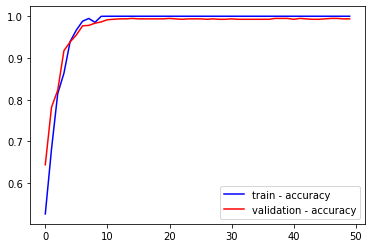




Loss - LeNet5 Architecture


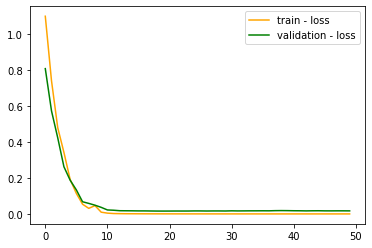

In [12]:
print("Accuracy - LeNet5 Architecture")
plt.plot(hist.history['accuracy'],c='b',label='train - accuracy')
plt.plot(hist.history['val_accuracy'],c='r',label='validation - accuracy')
plt.legend(loc='lower right')
plt.show()

print("\n\n")
print('Loss - LeNet5 Architecture')
plt.plot(hist.history['loss'],c='orange',label='train - loss')
plt.plot(hist.history['val_loss'],c='g',label='validation - loss')
plt.legend(loc='upper right')
plt.show()

In [13]:
model.evaluate(test)

16/16 [==============================] - 3s 145ms/step - loss: 0.0372 - accuracy: 0.9906


[0.037154391407966614, 0.9906347393989563]

In [14]:
model.save('LeNet-5e50.h5')

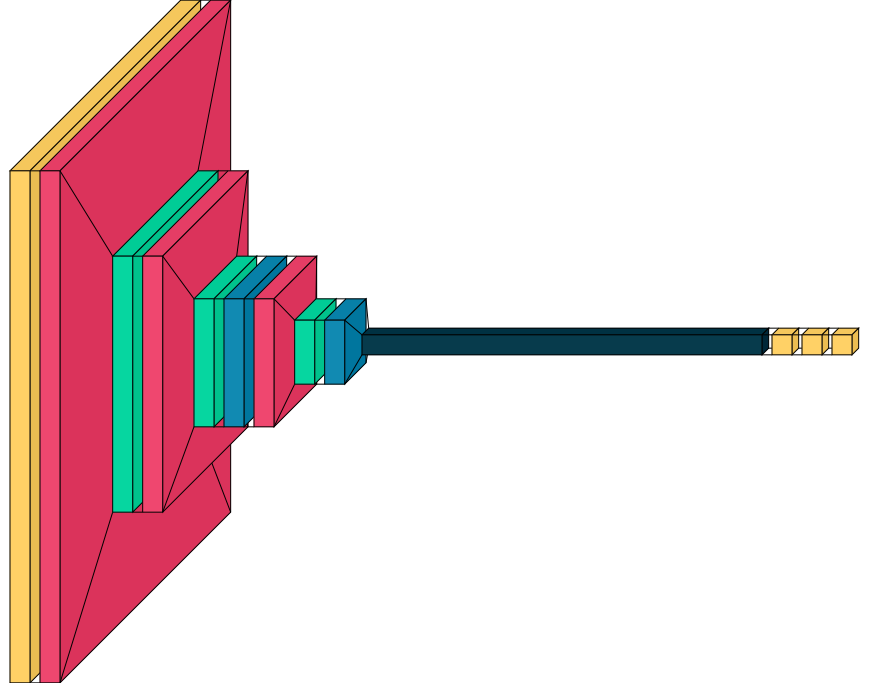

In [15]:
#0.5 accuracy with a LeNet-5 architecture. Better than random guess, but can get something better
#Let's try same architecture but MaxPooling instead of AveragePooling

#LeNet-5 CNN Architecture (with MaxPooling)
model2 = keras.Sequential()
model2.add(Rescaling(1./255, input_shape=(128, 128, 3)))
model2.add(Conv2D(filters=6, kernel_size=(3, 3), padding='same', activation = 'relu', kernel_initializer="he_normal"))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation = 'relu', kernel_initializer="he_normal"))
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Dropout(0.20))

model2.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(units = 128, activation = 'relu', kernel_initializer="he_normal"))
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units = 4, activation = 'softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
visualkeras.layered_view(model2)

In [16]:
hist2 = model2.fit(train, epochs = 50, validation_data = val)

Epoch 1/50
80/80 [==============================] - 35s 424ms/step - loss: 1.3797 - accuracy: 0.4759 - val_loss: 1.0401 - val_accuracy: 0.5010
Epoch 2/50
80/80 [==============================] - 45s 562ms/step - loss: 0.9715 - accuracy: 0.5161 - val_loss: 0.9207 - val_accuracy: 0.5574
Epoch 3/50
80/80 [==============================] - 41s 510ms/step - loss: 0.8957 - accuracy: 0.5853 - val_loss: 0.8753 - val_accuracy: 0.6441
Epoch 4/50
80/80 [==============================] - 41s 514ms/step - loss: 0.8273 - accuracy: 0.6224 - val_loss: 0.7610 - val_accuracy: 0.6868
Epoch 5/50
80/80 [==============================] - 42s 524ms/step - loss: 0.7657 - accuracy: 0.6568 - val_loss: 0.6741 - val_accuracy: 0.7328
Epoch 6/50
80/80 [==============================] - 40s 498ms/step - loss: 0.6882 - accuracy: 0.6962 - val_loss: 0.6046 - val_accuracy: 0.7484
Epoch 7/50
80/80 [==============================] - 49s 610ms/step - loss: 0.6135 - accuracy: 0.7367 - val_loss: 0.5588 - val_accuracy: 0.7850

Accuracy - LeNet-5 with MaxPooling


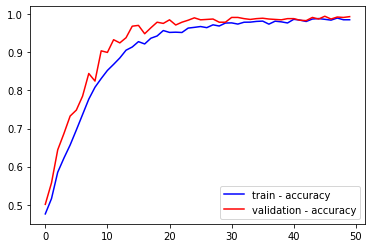




Loss - LeNet-5 with MaxPooling


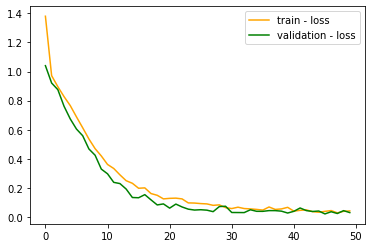

In [17]:
print("Accuracy - LeNet-5 with MaxPooling")
plt.plot(hist2.history['accuracy'],c='b',label='train - accuracy')
plt.plot(hist2.history['val_accuracy'],c='r',label='validation - accuracy')
plt.legend(loc='lower right')
plt.show()

print("\n\n")
print('Loss - LeNet-5 with MaxPooling')
plt.plot(hist2.history['loss'],c='orange',label='train - loss')
plt.plot(hist2.history['val_loss'],c='g',label='validation - loss')
plt.legend(loc='upper right')
plt.show()

In [18]:
model2.evaluate(test)

16/16 [==============================] - 3s 143ms/step - loss: 0.0331 - accuracy: 0.9906


[0.033087391406297684, 0.9906347393989563]

In [19]:
model2.save('LeNet-5Maxe50.h5')

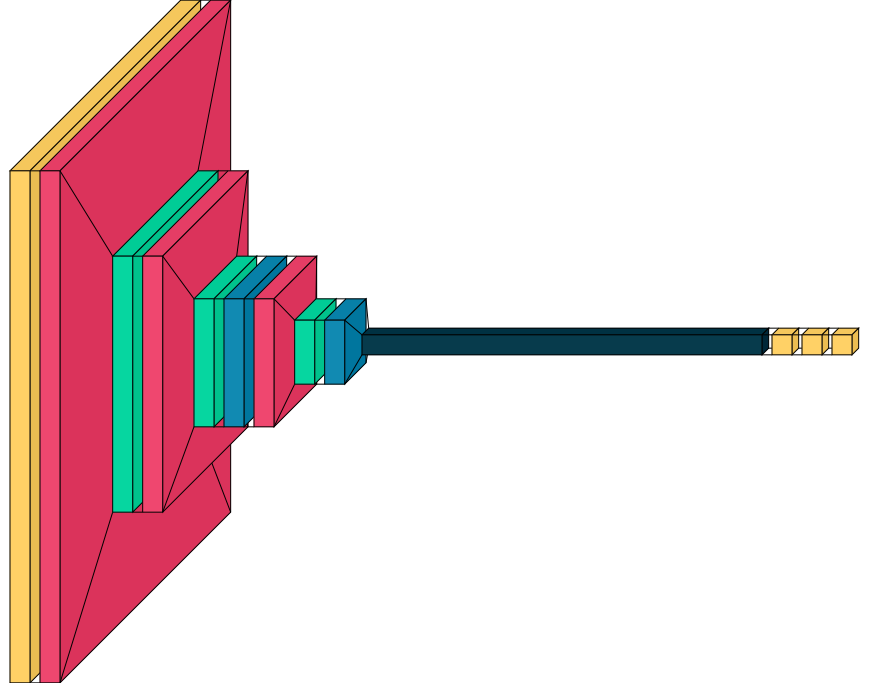

In [20]:
#New Architecture
model3 = Sequential()
model3.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model3.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Dropout(0.20))

model3.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128,activation="relu",kernel_initializer="he_normal"))
model3.add(Dense(64,"relu"))
model3.add(Dense(4,"softmax"))

model3.compile(loss="sparse_categorical_crossentropy", optimizer = "Adam",metrics=["accuracy"])
visualkeras.layered_view(model3)

In [21]:
hist3 = model3.fit(train, epochs = 50, validation_data = val)

Epoch 1/50
80/80 [==============================] - 66s 781ms/step - loss: 1.4556 - accuracy: 0.4854 - val_loss: 1.0252 - val_accuracy: 0.5866
Epoch 2/50
80/80 [==============================] - 61s 754ms/step - loss: 0.9410 - accuracy: 0.5470 - val_loss: 0.8851 - val_accuracy: 0.6086
Epoch 3/50
80/80 [==============================] - 61s 757ms/step - loss: 0.8870 - accuracy: 0.5767 - val_loss: 0.8414 - val_accuracy: 0.6336
Epoch 4/50
80/80 [==============================] - 64s 798ms/step - loss: 0.8382 - accuracy: 0.6109 - val_loss: 0.7480 - val_accuracy: 0.6806
Epoch 5/50
80/80 [==============================] - 63s 779ms/step - loss: 0.7411 - accuracy: 0.6685 - val_loss: 0.6368 - val_accuracy: 0.7317
Epoch 6/50
80/80 [==============================] - 61s 759ms/step - loss: 0.6769 - accuracy: 0.6988 - val_loss: 0.6083 - val_accuracy: 0.7453
Epoch 7/50
80/80 [==============================] - 55s 685ms/step - loss: 0.5759 - accuracy: 0.7533 - val_loss: 0.5388 - val_accuracy: 0.7662

Accuracy - CNN Model


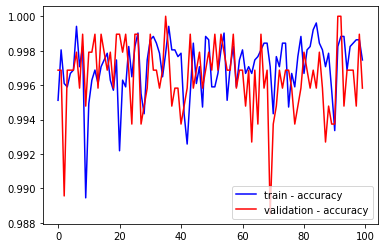




Loss - CNN Model


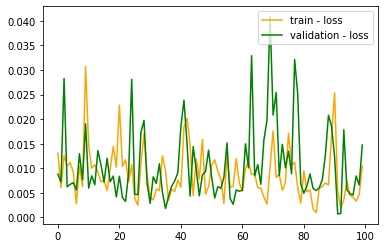

In [ ]:
print("Accuracy - CNN Model")
plt.plot(hist3.history['accuracy'],c='b',label='train - accuracy')
plt.plot(hist3.history['val_accuracy'],c='r',label='validation - accuracy')
plt.legend(loc='lower right')
plt.show()

print("\n\n")
print('Loss - CNN Model')
plt.plot(hist3.history['loss'],c='orange',label='train - loss')
plt.plot(hist3.history['val_loss'],c='g',label='validation - loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
model3.evaluate(test)

16/16 [==============================] - 3s 167ms/step - loss: 0.0160 - accuracy: 0.9958


[0.01598460040986538, 0.9958376884460449]

In [ ]:
model3.save('CNN_Model-e50.h5')